In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=8
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

I need to work through a couple of steps to fully develop the HartreeFockHamiltonian class for the given equation. Let's start with understanding the Hamiltonian.

The Hamiltonian is given by:
\begin{equation}
  \HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)
\end{equation}

Where $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ is a vector of creation operators, and:

\begin{equation}
  \HH_{\kk s} = \left(\begin{array}{ccc} \xi_{x}& \gamma_2(\kk)& \gamma_1(k_x)\\ \gamma_2(\kk)&\xi_{y}& \gamma_1(k_y)\\ \gamma_1(k_x)& \gamma_1(k_y)&\xi_{d}\end{array}\right)
\end{equation}

With additional terms for $f(n^p, \eta)$ and various parameters.

First, let's identify the dimensions and basis order for the Hamiltonian.

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see:
- $\hat{C}^{\dag}_{\kk s} = (\h

In [7]:
print(generated_code['thinking'])

I need to work through a couple of steps to fully develop the HartreeFockHamiltonian class for the given equation. Let's start with understanding the Hamiltonian.

The Hamiltonian is given by:
\begin{equation}
  \HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)
\end{equation}

Where $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ is a vector of creation operators, and:

\begin{equation}
  \HH_{\kk s} = \left(\begin{array}{ccc} \xi_{x}& \gamma_2(\kk)& \gamma_1(k_x)\\ \gamma_2(\kk)&\xi_{y}& \gamma_1(k_y)\\ \gamma_1(k_x)& \gamma_1(k_y)&\xi_{d}\end{array}\right)
\end{equation}

With additional terms for $f(n^p, \eta)$ and various parameters.

First, let's identify the dimensions and basis order for the Hamiltonian.

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see:
- $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{

In [8]:
print(generated_code['text'])

# Question 1: Dimension and Basis Order

Looking at the Hamiltonian structure, I can see:
- $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ represents three different orbitals
- The $s$ index represents spin (up/down)

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

# Question 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS: {
    "n^p": "Total density of holes on oxygen sites, sum of p_x and p_y occupancies across spins",
    "n": "Total density of holes (p_x + p_y + d across spins)",
    "η": "Nematic order parameter, difference between p_x and p_y occupancies across spins"
}

TERMS:
- $\gamma_1(k_x)$ and $\gamma_1(k_y)$ → H[0,0,2,k], H[0,2,0,k], H[1,1,2,k], H[1,2,1,k], NI
- $\gamma_2(\kk)$ → H[0,0,1,k], H[0,1,0,k], H[1,0,1,k], H[1,1,0,k], NI
- $\xi_x$ → H[0,0,0,k], H[1,0,0,k], I (depends on n^p and η)
- $\xi_y$ → H[0,1,1,k], H[1,1,1,k], I (depends on n^p and η)
- $\xi_

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for the three-band Emery model with p-d hybridization.
    
    The model includes p_x, p_y orbitals (oxygen) and d orbital (copper) with spin.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor of the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'
        self.D = (2, 3)  # (spin, orbital)
        self.basis_order = {'0': 'spin', '1': 'orbital'}
        # Order for each flavor:
        # spin: up, down
        # orbital: p_x, p_y, d

        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0)  # temperature, default to 0
        self.a = parameters.get(

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_8.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

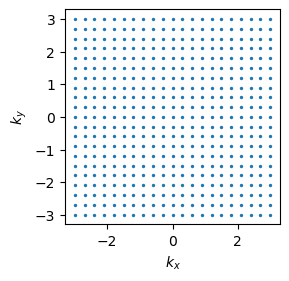

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

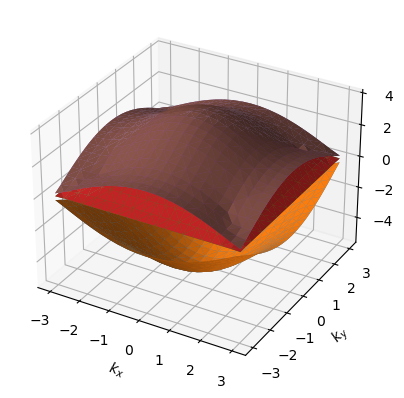

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

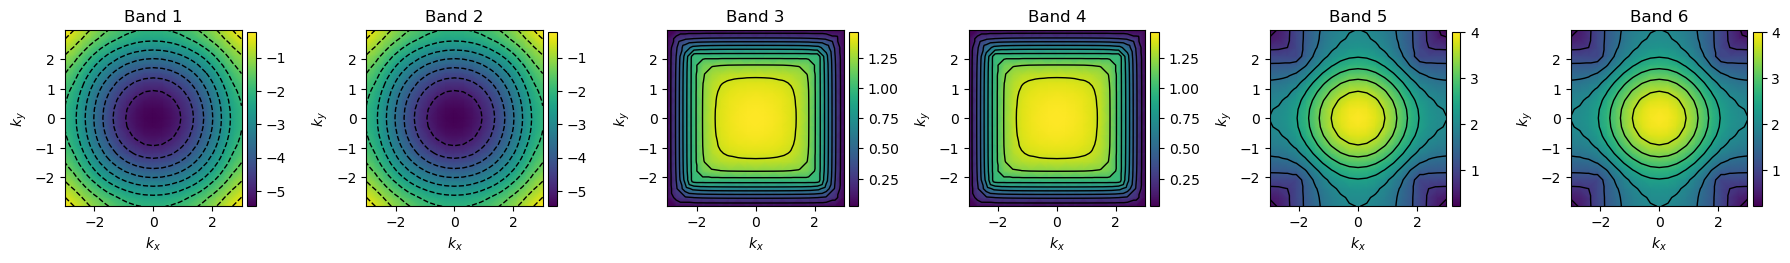

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 2


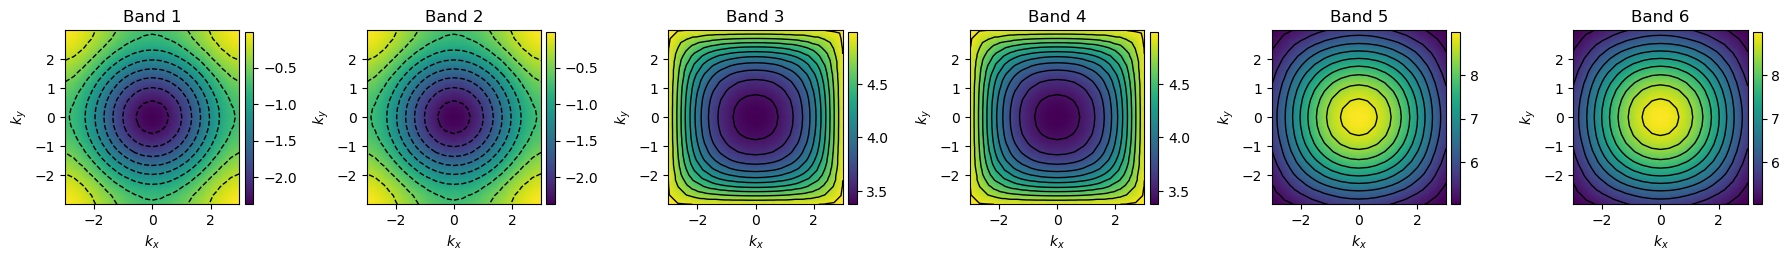

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


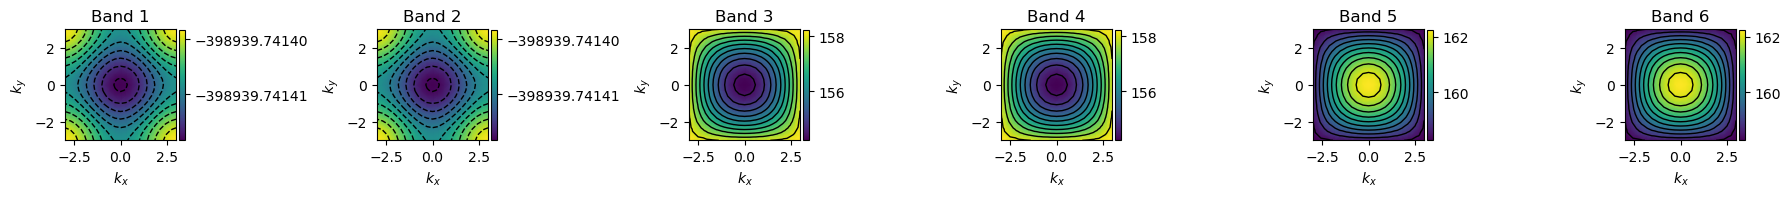

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 399093.97
U/T is 67259.95
mean_U is 31186.35


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I'm analyzing an image related to a condensed matter physics problem. Let me go through the elements in the image and check them against the rubric.

The image shows a grid of blue dots arranged in a square pattern. The x-axis is labeled as $k_x$ and ranges from approximately -3 to 3. The y-axis is labeled as $k_y$ and also ranges from approximately -3 to 3. The dots form a uniform grid throughout this square region.

According to the rubric, I need to check:
1. If this image shows a momentum space mesh in the first Brillouin zone of the concerned problem.
2. The point group symmetry of the mesh.

Looking at the Hamiltonian provided, it describes a three-band model with $p_x$, $p_y$, and $d$ orbitals on a square lattice, which is explicitly stated at the end of the problem.

For a square lattice, the first Brillouin zone is a square in reciprocal space centered at the origin. The conventional range for the first Brillouin zone of a s

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this image carefully based on the rubric.

The image shows 6 subplots labeled "Band 1" through "Band 6", each representing a false color plot with contour lines showing the band structure in the first Brillouin zone for a square lattice.

Going through the rubric points:

1. **Shape of the Brillouin zone boundary**:
   Looking at all the plots, I can see that the Brillouin zone is plotted as a square with boundaries from approximately -3 to +3 in both kx and ky directions. This is consistent with what we'd expect for a square lattice, where the first Brillouin zone is a square in reciprocal space.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions (yellow)**:
   - Bands 1 & 2: Highest energies appear at the edges of the shown region, with lowest (dark purple) at the center.
   - Bands 3 & 4: Highest energies are in the center (yellow square), with lowest at the edges.
   - Bands 5 & 6: Highes

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the band structure plots shown in the image based on the provided rubric. Let me go through each point in the rubric systematically.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

In the image, I can see 6 band plots (Band 1 through Band 6). In each plot, the axes are labeled as k_x and k_y, ranging from approximately -2 to 2 in both directions. The plots show a square-shaped region, which is consistent with the Brillouin zone of a square lattice. For a square lattice, we expect a square-shaped first Brillouin zone, so this matches the expected shape.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
- In Band 1 and Band 2: The highest energy regions (yellow) are at the corners of the Brillouin zone.
- In Band 3 and Band 4: The highest energy regions ar

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me analyze this systematically following the rubric:

1. First, identify the shape of the Brillouin zone boundary:
Looking at the plots, I can see that all six band plots show a square-shaped Brillouin zone with boundaries going from approximately -2.5 to 2.5 along both kx and ky axes. This is consistent with the expected Brillouin zone for a square lattice. This point is correct.

2. Examine the symmetry of the energy distribution:

2.1 Identify the highest energy regions (yellow):
- In Bands 1-4, the highest energy regions appear to be at the edges of the Brillouin zone.
- In Bands 5-6, there are clearly defined highest energy regions (yellow) at the center (k=0,0).

2.2 Trace the pattern of energy variation:
- Bands 1-2 show a symmetric pattern with energy decreasing from the edges toward the center in concentric contours.
- Bands 3-4 show a similar pattern but with different energy scales.
- Bands 5-6 show the opposite patter

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '8' saved to final_answer.yaml
